In [1]:
!pip install tensorflow opencv-python matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [65]:
pip install scikit-image


                                              0.0/22.8 MB ? eta -:--:--
                                              0.0/22.8 MB ? eta -:--:--
                                              0.0/22.8 MB ? eta -:--:--
                                              0.0/22.8 MB ? eta -:--:--
                                              0.0/22.8 MB ? eta -:--:--
                                             0.1/22.8 MB 280.5 kB/s eta 0:01:21
                                             0.1/22.8 MB 309.1 kB/s eta 0:01:14
                                             0.1/22.8 MB 328.0 kB/s eta 0:01:10
                                             0.1/22.8 MB 328.0 kB/s eta 0:01:10
                                             0.2/22.8 MB 412.5 kB/s eta 0:00:55
                                             0.3/22.8 MB 542.5 kB/s eta 0:00:42
                                             0.3/22.8 MB 571.2 kB/s eta 0:00:40
                                             0.3/22.8 MB 571.2 kB/s eta 0:00:40

In [2]:
!pip list

Package                       Version
----------------------------- ---------------
absl-py                       1.4.0
alabaster                     0.7.12
anaconda-client               1.11.1
anaconda-navigator            2.4.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binary

In [7]:
import tensorflow as tf
import os

In [2]:
import cv2
import imghdr

In [5]:
data_dir = 'data'

In [60]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [61]:
os.listdir(os.path.join(data_dir,"normal"))

['image_0.png',
 'image_1.png',
 'image_10.png',
 'image_100.png',
 'image_101.png',
 'image_104.png',
 'image_105.png',
 'image_106.png',
 'image_107.png',
 'image_108.png',
 'image_109.png',
 'image_11.png',
 'image_110.png',
 'image_111.png',
 'image_112.png',
 'image_113.png',
 'image_114.png',
 'image_115.png',
 'image_116.png',
 'image_117.png',
 'image_118.png',
 'image_119.png',
 'image_12.png',
 'image_120.png',
 'image_121.png',
 'image_122.png',
 'image_123.png',
 'image_124.png',
 'image_125.png',
 'image_126.png',
 'image_127.png',
 'image_128.png',
 'image_129.png',
 'image_13.png',
 'image_130.png',
 'image_131.png',
 'image_132.png',
 'image_133.png',
 'image_134.png',
 'image_135.png',
 'image_136.png',
 'image_137.png',
 'image_138.png',
 'image_139.png',
 'image_14.png',
 'image_140.png',
 'image_141.png',
 'image_142.png',
 'image_143.png',
 'image_144.png',
 'image_145.png',
 'image_146.png',
 'image_147.png',
 'image_148.png',
 'image_149.png',
 'image_15.png',
 '

In [62]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [64]:
data = tf.keras.utils.image_dataset_from_directory("data")

Found 507 files belonging to 2 classes.


In [65]:
data_iterator = data.as_numpy_iterator()

In [66]:
batch = data_iterator.next()

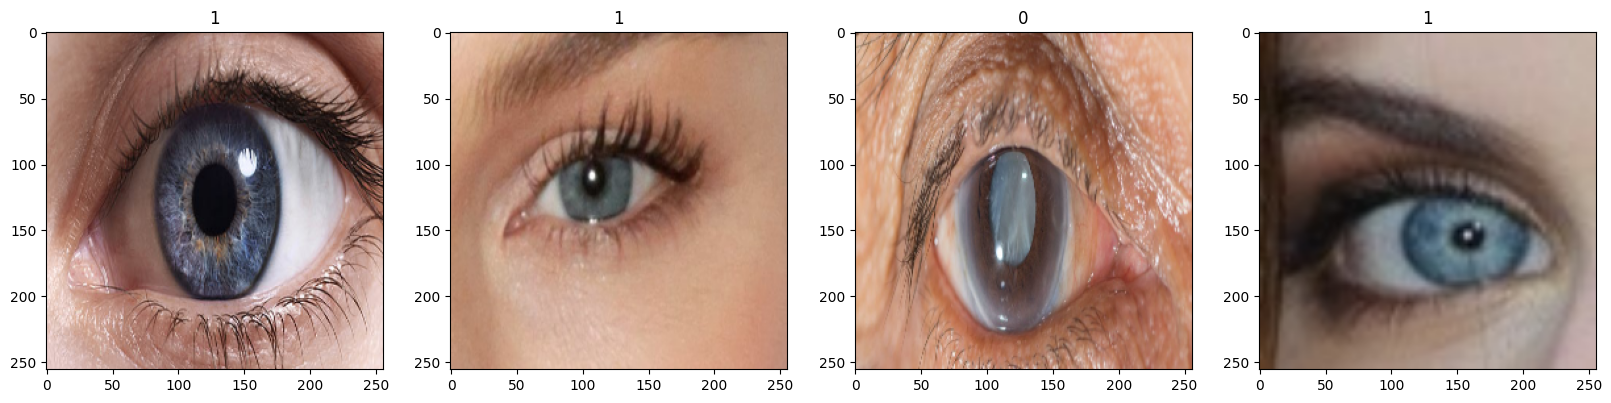

In [67]:
# class 0 --- cataract
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [68]:
data = data.map(lambda x, y: (x/255, y))

In [69]:
data.as_numpy_iterator().next()

(array([[[[8.68914664e-01, 5.98326445e-01, 4.45385277e-01],
          [8.53140295e-01, 5.70787370e-01, 4.13924634e-01],
          [8.34348202e-01, 5.51995277e-01, 3.95132512e-01],
          ...,
          [3.86645973e-01, 1.70959711e-01, 1.80185363e-02],
          [4.14242506e-01, 1.79733455e-01, 1.81908701e-02],
          [4.57157642e-01, 2.09363505e-01, 2.57774200e-02]],
 
         [[8.57425690e-01, 5.93087494e-01, 4.33160990e-01],
          [8.63932312e-01, 5.93344033e-01, 4.32559729e-01],
          [8.62021267e-01, 5.80035985e-01, 4.23050702e-01],
          ...,
          [3.23020071e-01, 1.15050554e-01, 4.86366422e-04],
          [3.77833933e-01, 1.42459407e-01, 1.30974269e-03],
          [4.39391851e-01, 1.93926170e-01, 1.65977329e-02]],
 
         [[8.58953714e-01, 5.96208632e-01, 4.31502759e-01],
          [8.70952070e-01, 6.00363791e-01, 4.39579517e-01],
          [8.48655820e-01, 5.78067541e-01, 4.17283237e-01],
          ...,
          [2.62653172e-01, 7.11090714e-02, 2.4126

In [70]:
len(data)

16

In [75]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)

In [76]:
val_size

4

In [77]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [79]:
model = Sequential()

In [80]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [81]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [82]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

In [83]:
logdir= 'logs'

In [84]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [85]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
11/11 [==============================] - 16s 1s/step - loss: 0.9362 - accuracy: 0.5710 - val_loss: 0.6436 - val_accuracy: 0.6797
Epoch 2/20
11/11 [==============================] - 15s 1s/step - loss: 0.5393 - accuracy: 0.7784 - val_loss: 0.4299 - val_accuracy: 0.8672
Epoch 3/20
11/11 [==============================] - 16s 1s/step - loss: 0.3761 - accuracy: 0.8494 - val_loss: 0.2797 - val_accuracy: 0.8906
Epoch 4/20
11/11 [==============================] - 15s 1s/step - loss: 0.3183 - accuracy: 0.8864 - val_loss: 0.2795 - val_accuracy: 0.8672
Epoch 5/20
11/11 [==============================] - 14s 1s/step - loss: 0.2533 - accuracy: 0.9205 - val_loss: 0.2512 - val_accuracy: 0.9141
Epoch 6/20
11/11 [==============================] - 14s 1s/step - loss: 0.2058 - accuracy: 0.9233 - val_loss: 0.1563 - val_accuracy: 0.9297
Epoch 7/20
11/11 [==============================] - 14s 1s/step - loss: 0.1886 - accuracy: 0.9347 - val_loss: 0.2045 - val_accuracy: 0.9062
Epoch 8/20
11/11 [==

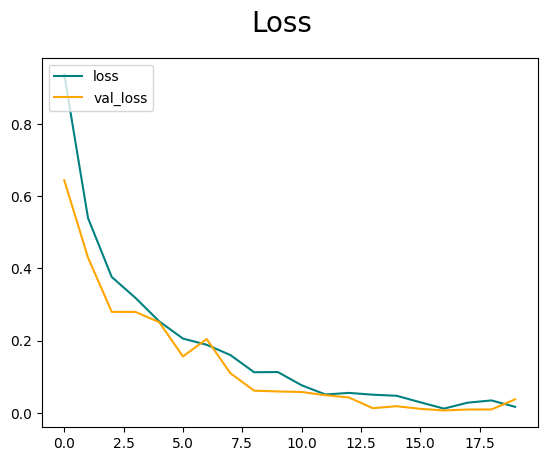

In [86]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

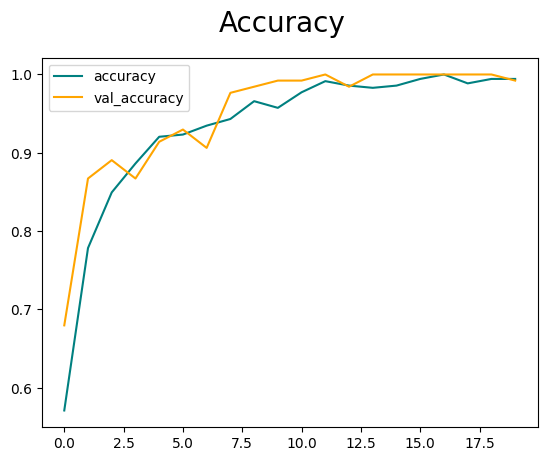

In [87]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [88]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [89]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [90]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 188ms/step


In [91]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


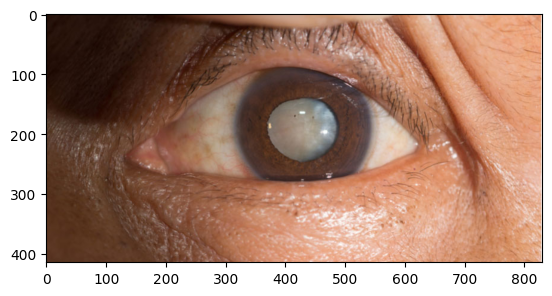

In [5]:
img = cv2.imread('cattest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

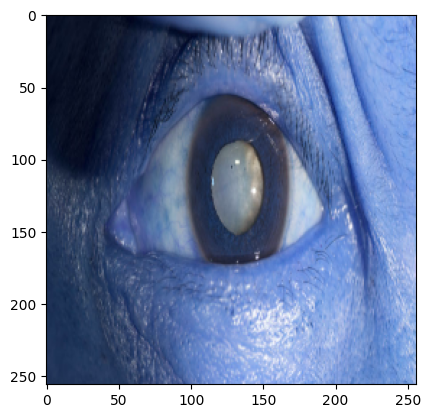

In [14]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [15]:
from tensorflow.keras.models import load_model

In [16]:
new_model = load_model('models/cataracttest.h5')

In [19]:
yhat = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 180ms/step


In [20]:
yhat

array([[0.00283843]], dtype=float32)

In [21]:
if yhat > 0.5: 
    print(f'Predicted class is normal')
else:
    print(f'Predicted class is cataract')

Predicted class is cataract
